In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [122]:
df = pd.read_csv('/Users/vij/Downloads/Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Separating the target variable for LR model
y = df['Churn']
X = df.drop(columns=['Churn'])

In [ ]:
#Identifying the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
#Using One-hot encoding for categorical variables only to avoid errors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

In [ ]:
#Spliting the dataset into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
#Model Accuracy evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8261178140525195
              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



/var/folders/48/c2n8qyv51mvcklkbs5xjsh5w0000gn/T/ipykernel_36438/343664473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


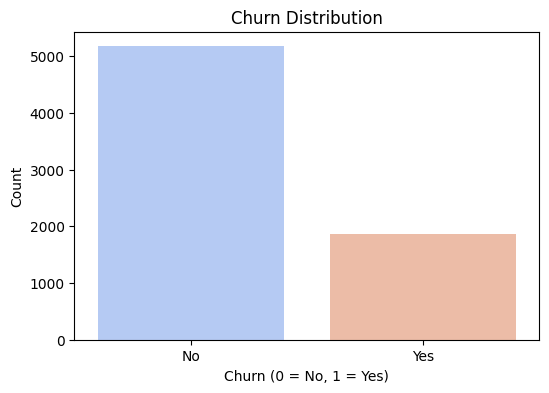

In [ ]:
#VISUALIZATIONS 
#Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

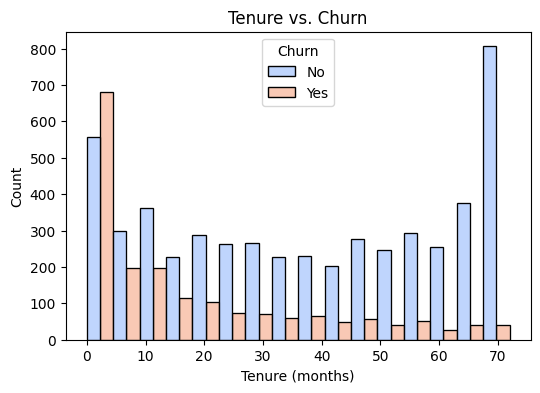

In [ ]:
#Tenure vs. Churn 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='dodge', palette='coolwarm')
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

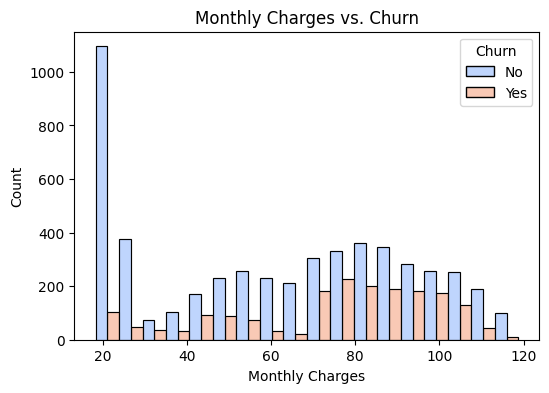

In [ ]:
#Monthly Charges vs. Churn 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='dodge', palette='coolwarm')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

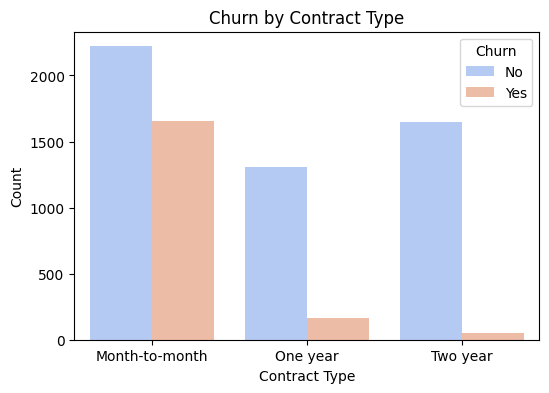

In [ ]:
#Contract Type vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Contract'], hue=df['Churn'], palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


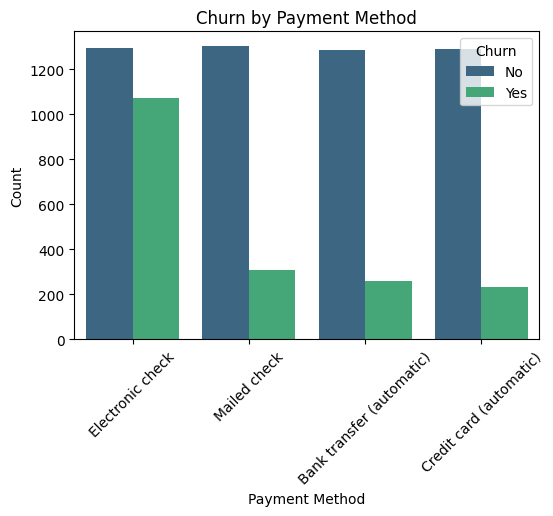

In [ ]:
#Payment Method vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'], palette='viridis')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

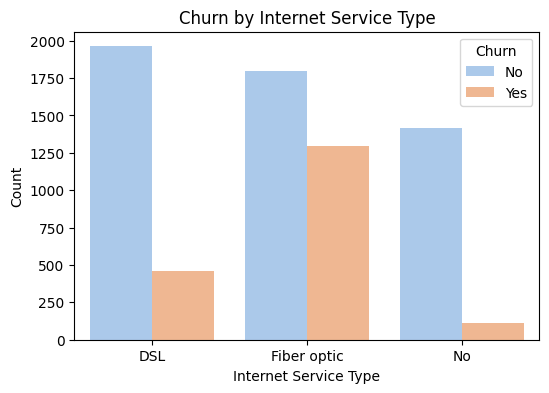

In [ ]:
#Internet Service vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=df['InternetService'], hue=df['Churn'], palette='pastel')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()